# Individual credibility signal analysis

## Setup

In [1]:
from pathlib import Path
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# plot settings
plt.style.use('seaborn-whitegrid')

# load datasets
likert_datasets = ["credcoalition.csv", "microsoft.csv", "reconcile.csv"]
binary_datasets = ["fnn-gossip.csv", "fnn-politifact.csv"]

likert_per_file = (pd.read_csv(os.path.join(os.getcwd(), "datasets_evaluated", dataset), sep=";",index_col="url") 
                   for dataset in likert_datasets)
binary_per_file = (pd.read_csv(os.path.join(os.getcwd(), "datasets_evaluated", dataset), sep=";",index_col="url") 
                   for dataset in binary_datasets)

likert_df = pd.concat(likert_per_file)
binary_df = pd.concat(binary_per_file)

# group likert ratings into bins
likert_df["rating_bin"] = likert_df.apply(lambda row: 1 if row.rating < 1.5 else 2 if row.rating < 2.5
                                          else 3 if row.rating < 3.5 else 4 if row.rating < 4.5 else 5, axis=1)

# swap 0 <-> 1 fake news classification to facilitate comparisons with credibility ratings (higher rating = better)
binary_df["rating"] = 1 - binary_df["rating"]

# rating distributions
print("\nLikert data: " + str(likert_df.shape) + " urls x values\nRating bins distribution:")
print(likert_df["rating_bin"].value_counts().sort_index().to_string())
print("\nBinary data: " + str(binary_df.shape) + " urls x values\nRatings distribution:")
print(binary_df["rating"].value_counts().sort_index().to_string())


Likert data: (242, 78) urls x values
Rating bins distribution:
1     16
2     24
3     36
4    109
5     57

Binary data: (200, 77) urls x values
Ratings distribution:
0.0    100
1.0    100


## Errors

In [2]:
signal = "errors_grammar_spelling"

#### Scatterplots

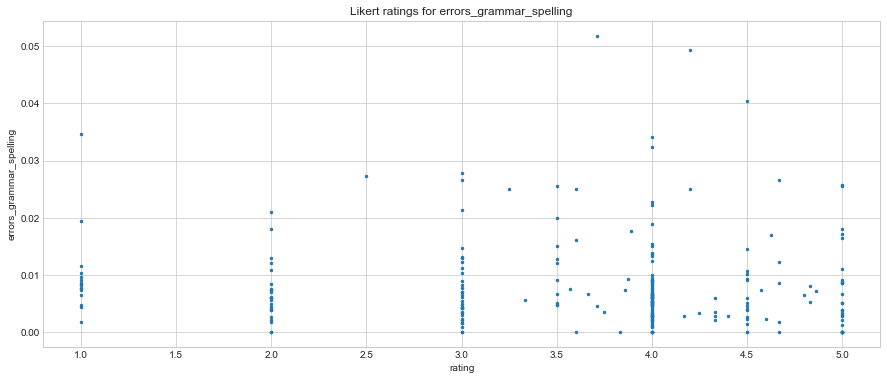

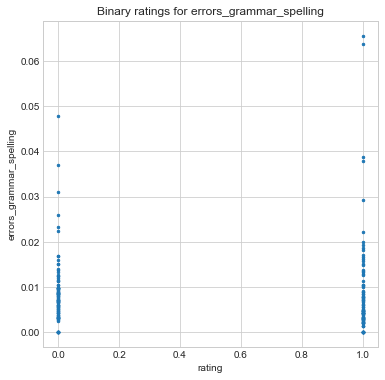

In [3]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

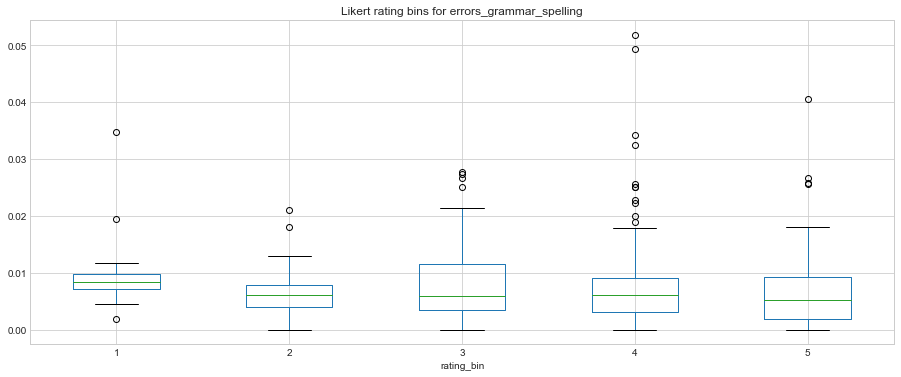

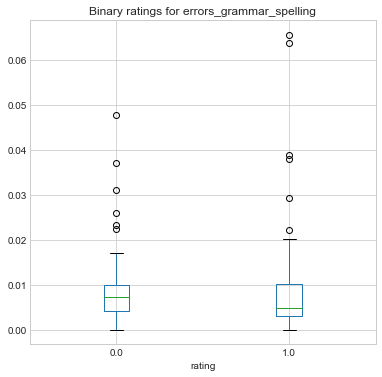

In [4]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

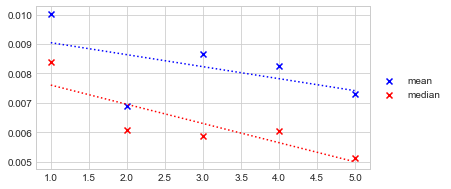

   rating      mean    median
0       1  0.010031  0.008376
1       2  0.006882  0.006079
2       3  0.008675  0.005884
3       4  0.008261  0.006042
4       5  0.007305  0.005137


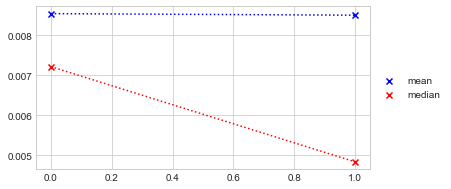

   rating      mean    median
0       0  0.008548  0.007220
1       1  0.008509  0.004832


In [5]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [6]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.15696510444795375
Likert p: 0.014512062702380864

Binary rho: -0.13455316354892577
Binary p: 0.05748706642342811


## Author

In [9]:
signal = "score_author"

#### Scatterplots

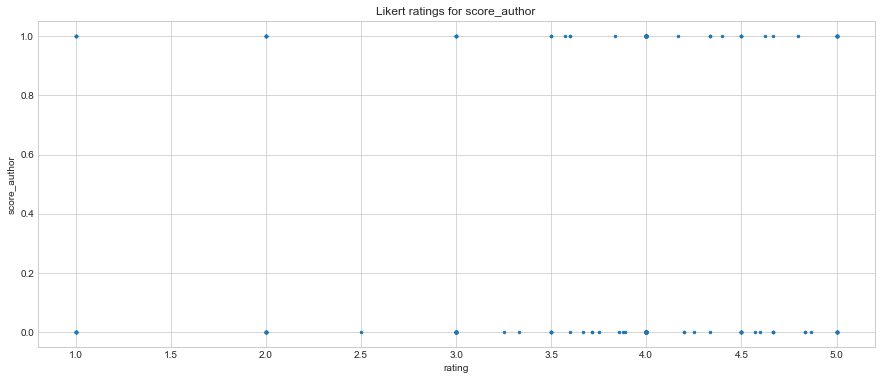

In [10]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
# binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
# plt.show()

#### Boxplots

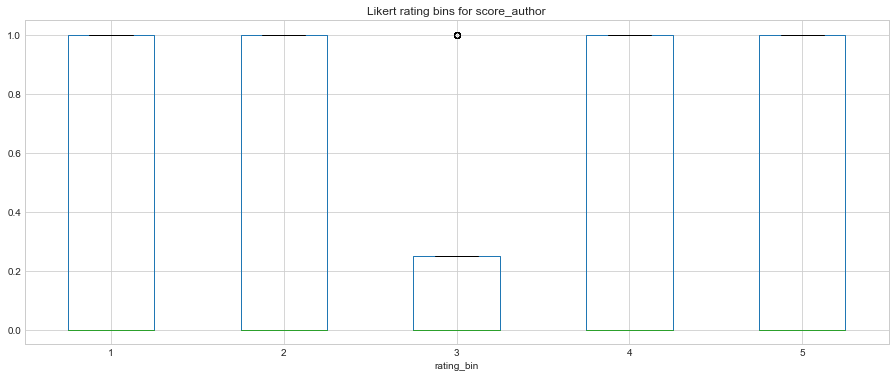

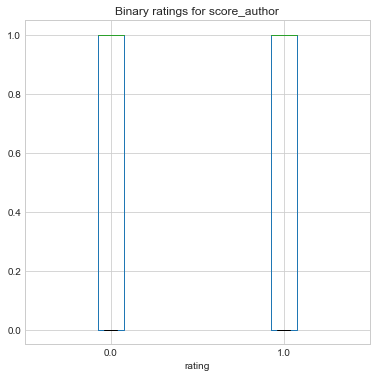

In [11]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

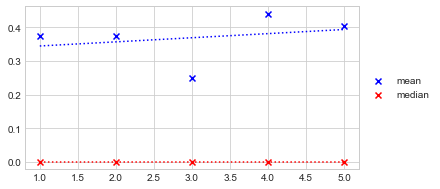

   rating      mean  median
0       1  0.375000     0.0
1       2  0.375000     0.0
2       3  0.250000     0.0
3       4  0.440367     0.0
4       5  0.403509     0.0


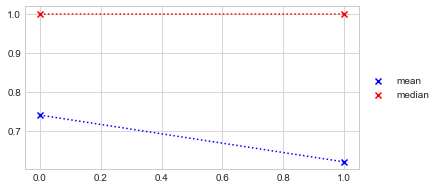

   rating  mean  median
0       0  0.74     1.0
1       1  0.62     1.0


In [12]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [13]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: 0.09386579911778663
Likert p: 0.14542994964062508

Binary rho: -0.12862393885688164
Binary p: 0.06949889859093465


## Domain ending

In [14]:
signal = "score_url_domain_ending"

#### Scatterplots

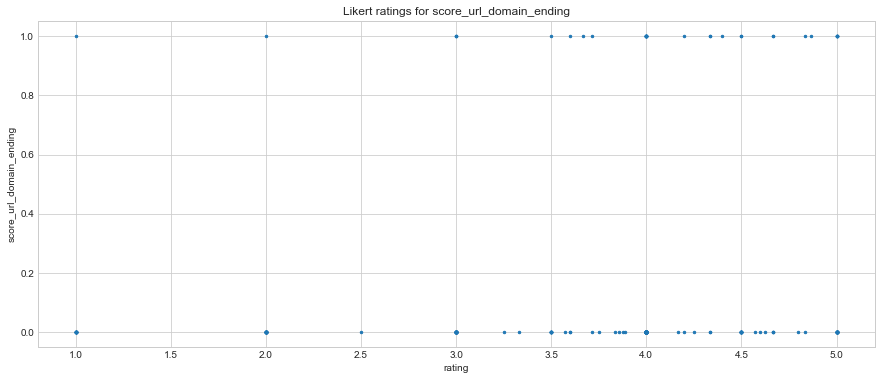

In [15]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
# binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
# plt.show()

#### Boxplots

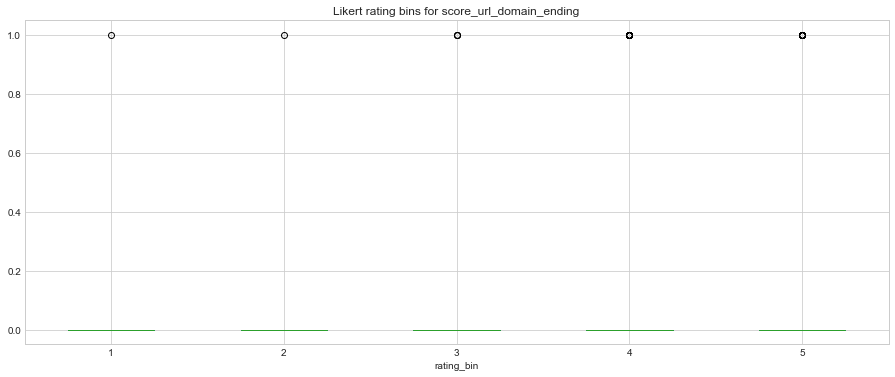

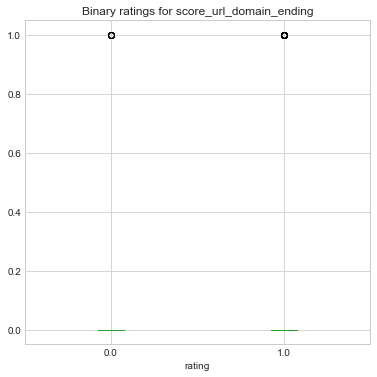

In [16]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

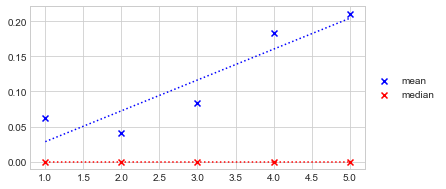

   rating      mean  median
0       1  0.062500     0.0
1       2  0.041667     0.0
2       3  0.083333     0.0
3       4  0.183486     0.0
4       5  0.210526     0.0


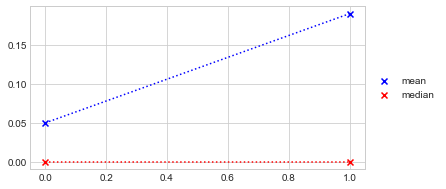

   rating  mean  median
0       0  0.05     0.0
1       1  0.19     0.0


In [17]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [18]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: 0.17465521406681286
Likert p: 0.0064516455374182885

Binary rho: 0.2154101092138323
Binary p: 0.0021890449509689484


## Clickbait

In [19]:
signal = "score_clickbait"

# get dataframes without rows containing missing data (-10 => signal could not be evaluated)
likert_copy = likert_df
binary_copy = binary_df
likert_df = likert_df[["rating", "rating_bin", signal]][likert_df[signal] > -10]
binary_df = binary_df[["rating", signal]][binary_df[signal] > -10]

#### Scatterplots

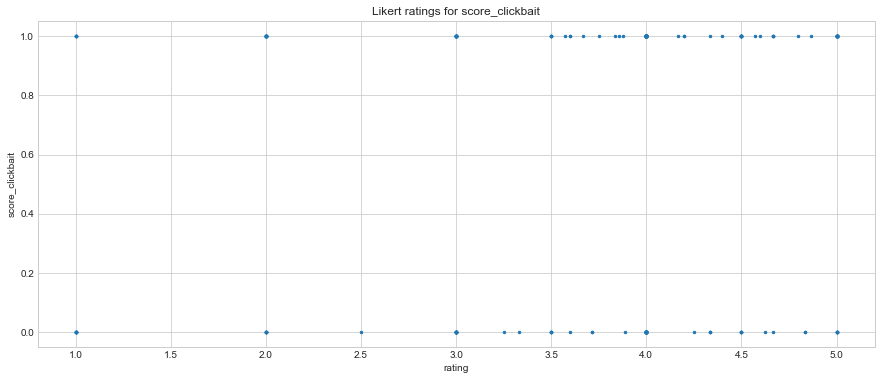

In [20]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
# binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
# plt.show()

#### Boxplots

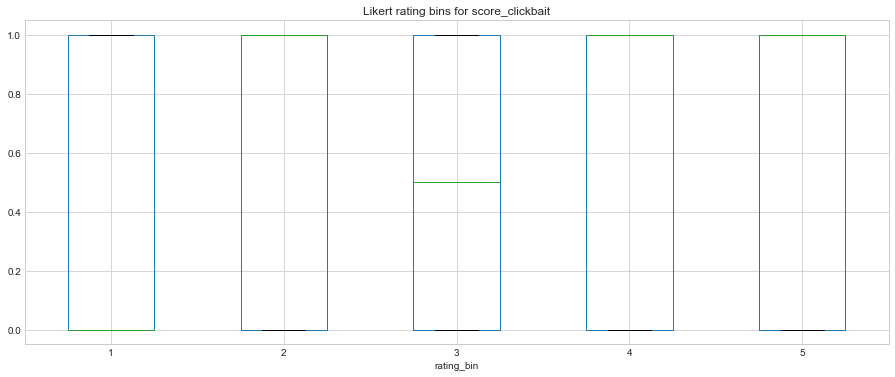

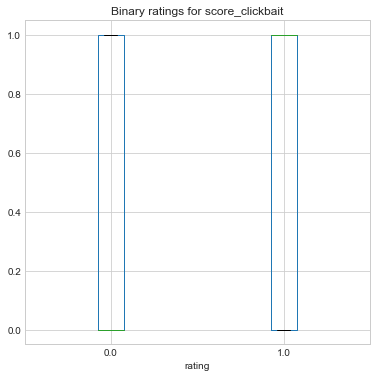

In [21]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

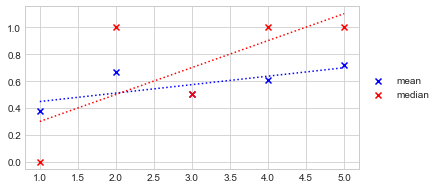

   rating      mean  median
0       1  0.375000     0.0
1       2  0.666667     1.0
2       3  0.500000     0.5
3       4  0.605505     1.0
4       5  0.719298     1.0


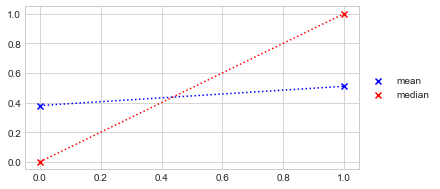

   rating  mean  median
0       0  0.38     0.0
1       1  0.51     1.0


In [22]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [23]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: 0.14064421250301667
Likert p: 0.0287084757508215

Binary rho: 0.1307937102275355
Binary p: 0.06488545107672941


In [ ]:
# get back original dataframes
likert_df = likert_copy
binary_df = binary_copy

## External links

In [24]:
signal = "links_count"

#### Scatterplots

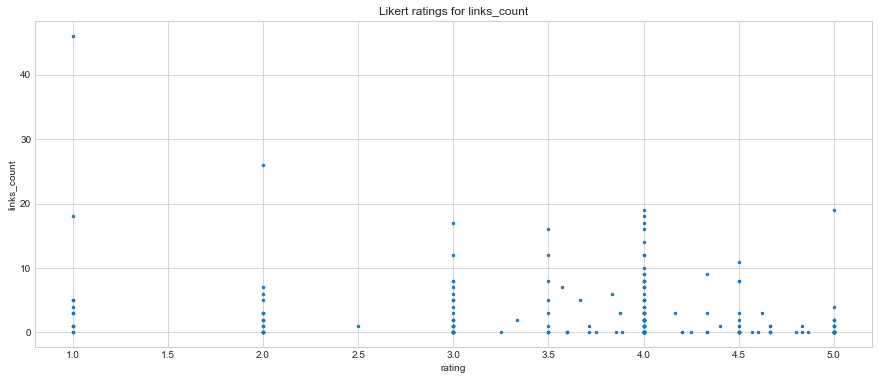

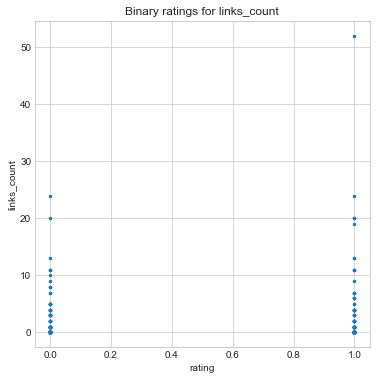

In [25]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

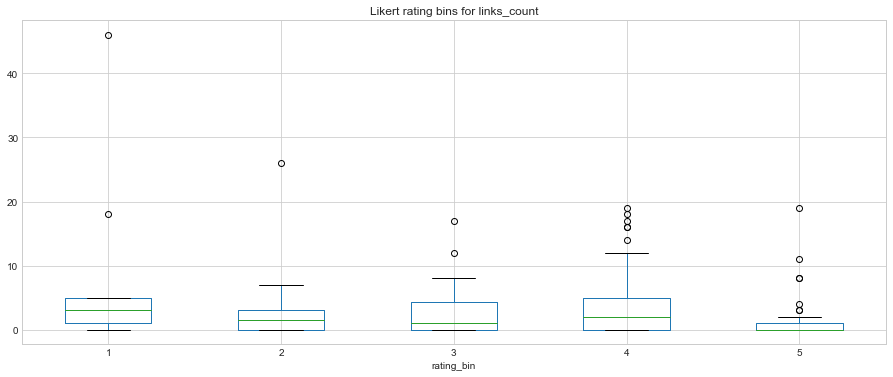

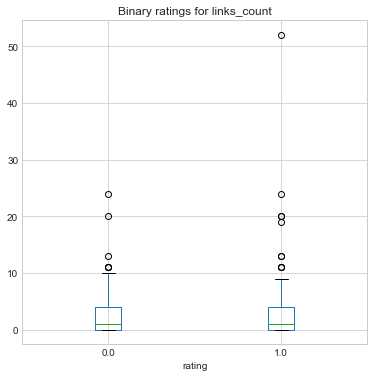

In [26]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

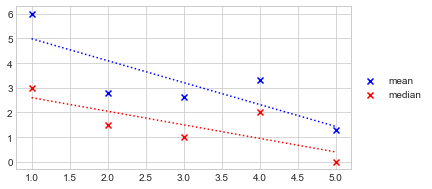

   rating      mean  median
0       1  6.000000     3.0
1       2  2.791667     1.5
2       3  2.638889     1.0
3       4  3.311927     2.0
4       5  1.298246     0.0


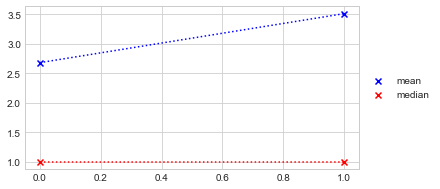

   rating  mean  median
0       0  2.68     1.0
1       1  3.51     1.0


In [27]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [28]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.20656471878902857
Likert p: 0.0012306498474572481

Binary rho: 0.007245895034799406
Binary p: 0.9188904508415539


## Subjectivity

In [29]:
signal = "subjectivity"

#### Scatterplots

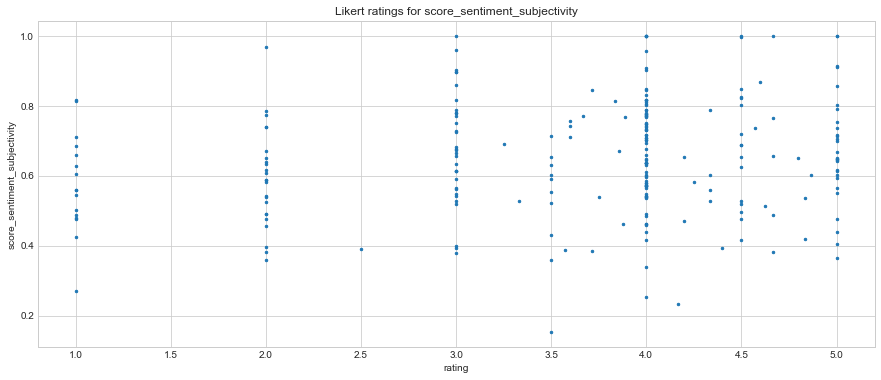

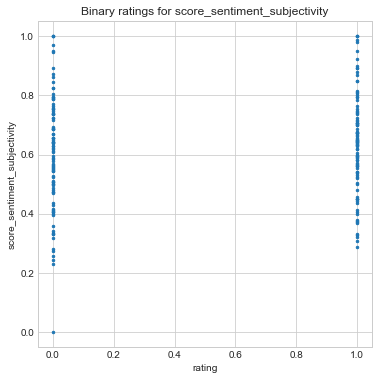

In [30]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

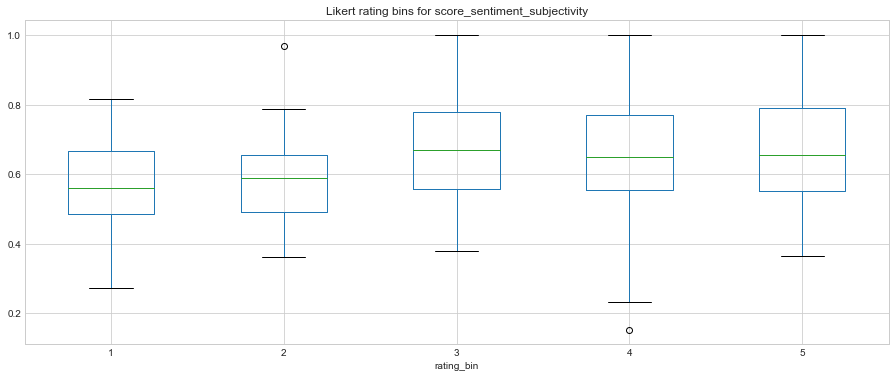

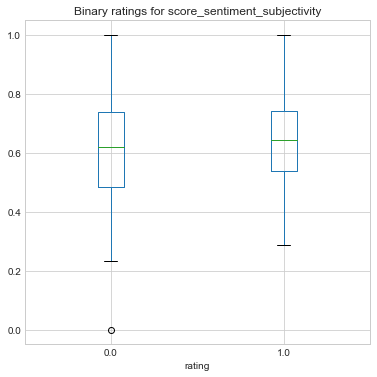

In [31]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

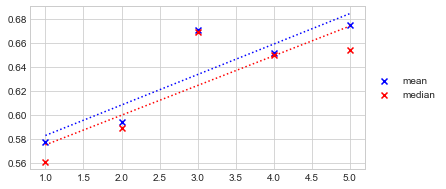

   rating      mean    median
0       1  0.577026  0.560829
1       2  0.593859  0.588644
2       3  0.670338  0.669045
3       4  0.651267  0.649403
4       5  0.675026  0.653995


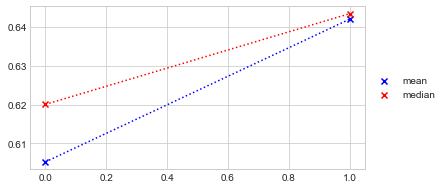

   rating      mean    median
0       0  0.605275  0.620032
1       1  0.641920  0.643332


In [32]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [33]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: 0.1341265351272169
Likert p: 0.03705596840175694

Binary rho: 0.08807704056796019
Binary p: 0.21490080386232652


## Question marks (text)

In [34]:
signal = "questions_text_per_sentence"

#### Scatterplots

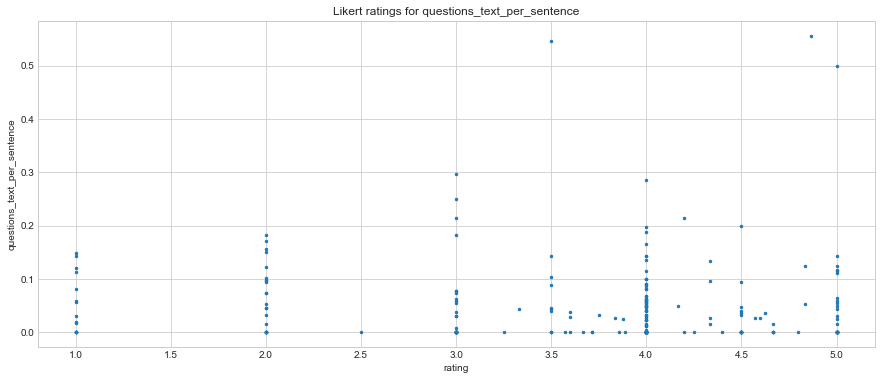

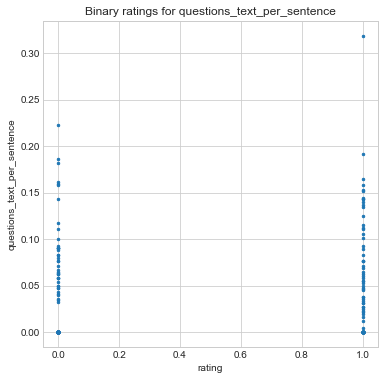

In [35]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

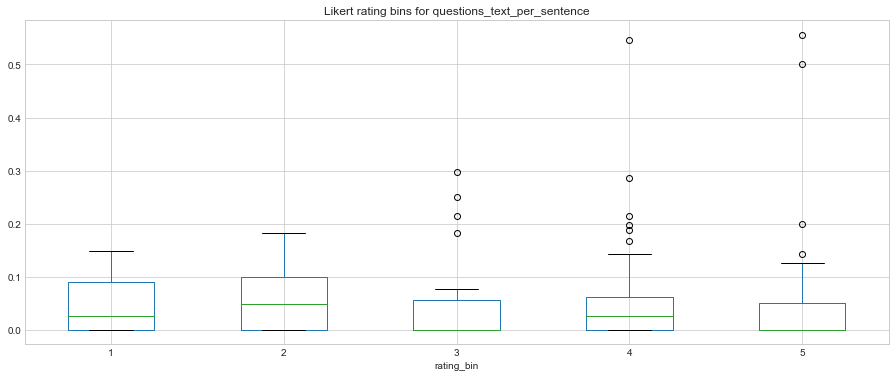

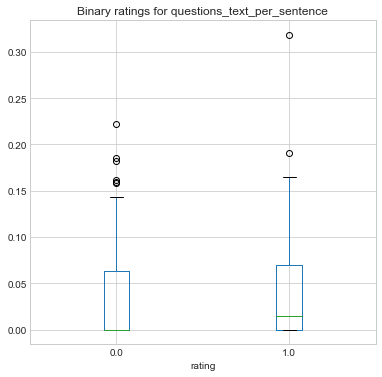

In [36]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

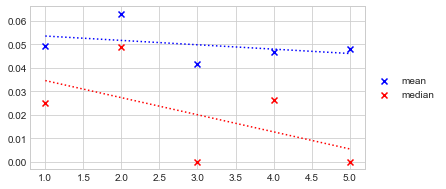

   rating      mean    median
0       1  0.049349  0.025059
1       2  0.063052  0.048872
2       3  0.041686  0.000000
3       4  0.046749  0.026316
4       5  0.048219  0.000000


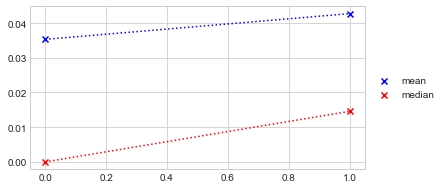

   rating      mean    median
0       0  0.035317  0.000000
1       1  0.042729  0.014572


In [37]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [38]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.06683470091752572
Likert p: 0.3004452635246648

Binary rho: 0.07933500120854484
Binary p: 0.2641247981146967


## Question marks (headline)

In [70]:
signal = "questions_title"

# get dataframes without rows containing missing data (-10 => signal could not be evaluated)
likert_copy = likert_df
binary_copy = binary_df
likert_df = likert_df[["rating", "rating_bin", signal]][likert_df[signal] > -10]
binary_df = binary_df[["rating", signal]][binary_df[signal] > -10]

#### Scatterplots

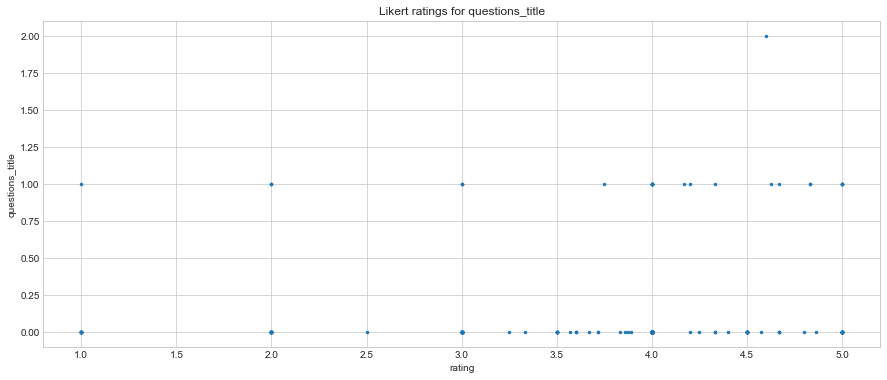

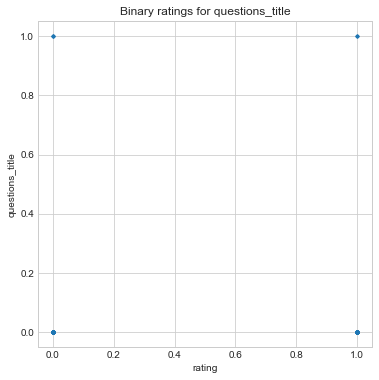

In [71]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

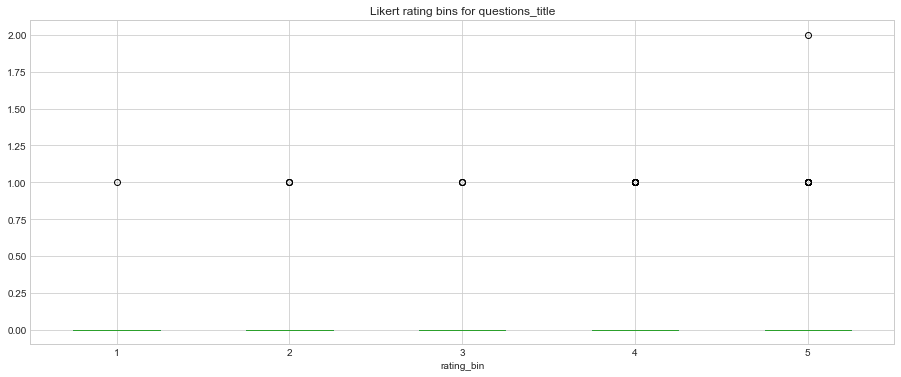

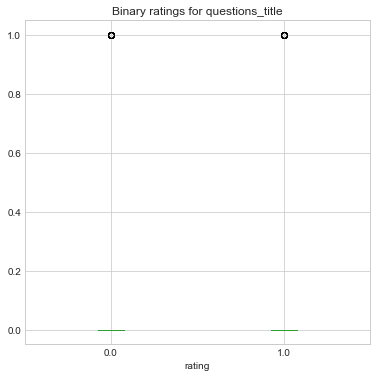

In [72]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

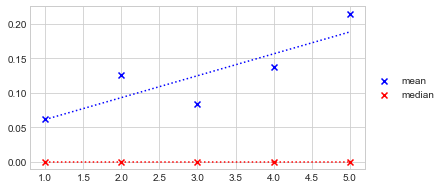

   rating      mean  median
0       1  0.062500     0.0
1       2  0.125000     0.0
2       3  0.083333     0.0
3       4  0.137615     0.0
4       5  0.214286     0.0


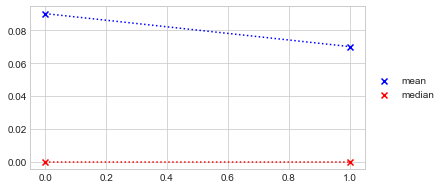

   rating  mean  median
0       0  0.09     0.0
1       1  0.07     0.0


In [73]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [74]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: 0.1467793629521935
Likert p: 0.022658777643545555

Binary rho: -0.036860489038724284
Binary p: 0.6043224020814487


In [75]:
# get back original dataframes
likert_df = likert_copy
binary_df = binary_copy

## Exclamation marks (text)

In [44]:
signal = "exclamations_text_per_sentence"

#### Scatterplots

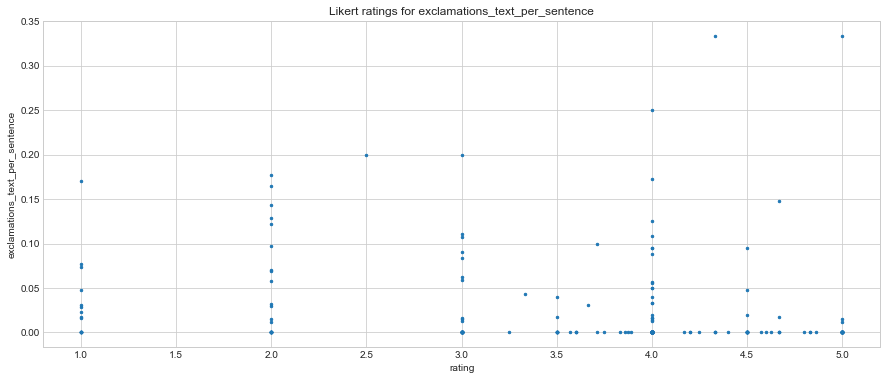

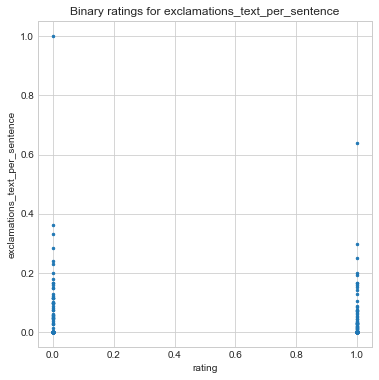

In [45]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

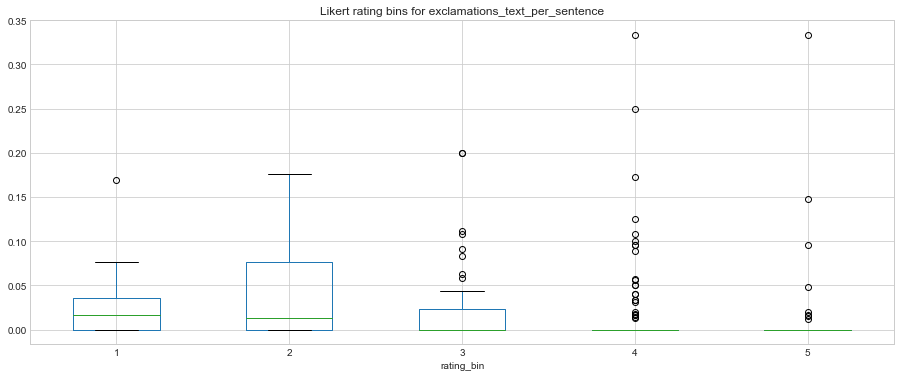

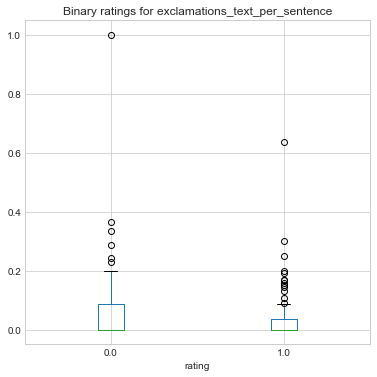

In [46]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

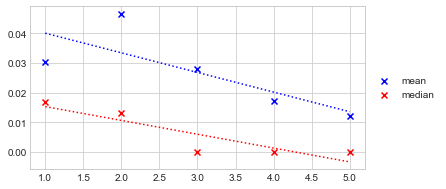

   rating      mean    median
0       1  0.030322  0.016685
1       2  0.046546  0.013137
2       3  0.027814  0.000000
3       4  0.017031  0.000000
4       5  0.012063  0.000000


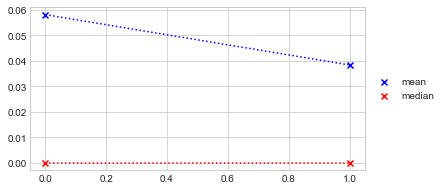

   rating      mean  median
0       0  0.058104     0.0
1       1  0.038364     0.0


In [47]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [48]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.2768877057389163
Likert p: 1.2378182941041495e-05

Binary rho: -0.05840288021498225
Binary p: 0.411380952305743


## Exclamation marks (headline)

In [76]:
signal = "exclamations_title"

# get dataframes without rows containing missing data (-10 => signal could not be evaluated)
likert_copy = likert_df
binary_copy = binary_df
likert_df = likert_df[["rating", "rating_bin", signal]][likert_df[signal] > -10]
binary_df = binary_df[["rating", signal]][binary_df[signal] > -10]

#### Scatterplots

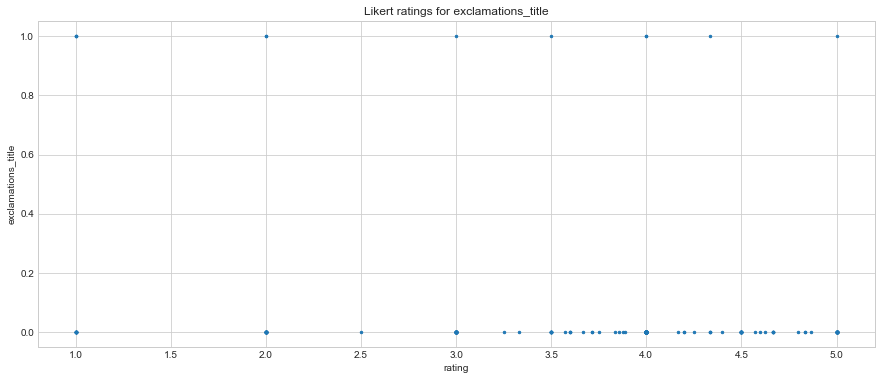

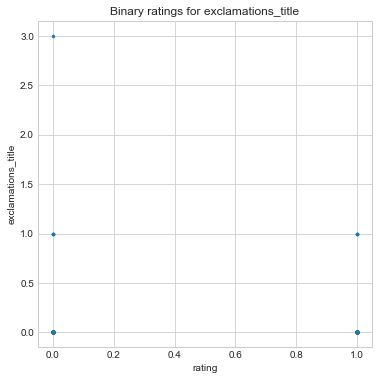

In [77]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

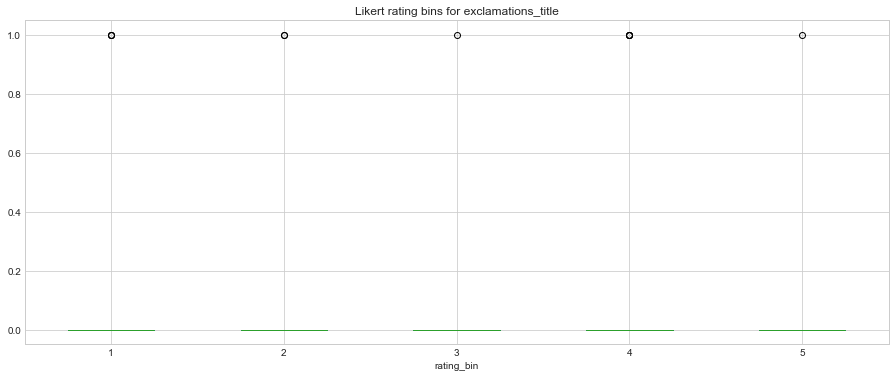

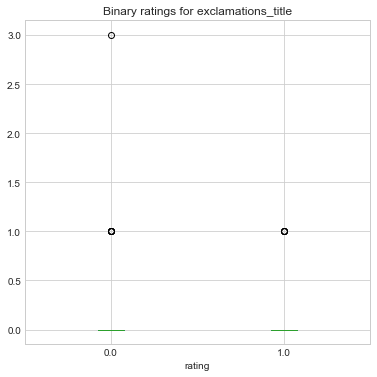

In [78]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

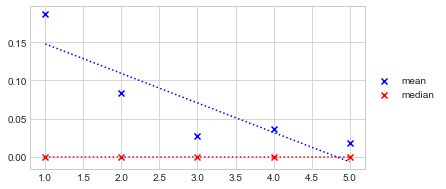

   rating      mean  median
0       1  0.187500     0.0
1       2  0.083333     0.0
2       3  0.027778     0.0
3       4  0.036697     0.0
4       5  0.017857     0.0


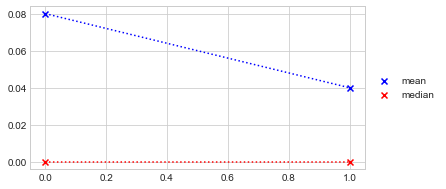

   rating  mean  median
0       0  0.08     0.0
1       1  0.04     0.0


In [79]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [80]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.12364482059660827
Likert p: 0.055254970203228324

Binary rho: -0.04679526849272045
Binary p: 0.5105397204906478


In [81]:
# get back original dataframes
likert_df = likert_copy
binary_df = binary_copy

## All caps (text)

In [54]:
signal = "all_caps_text"

#### Scatterplots

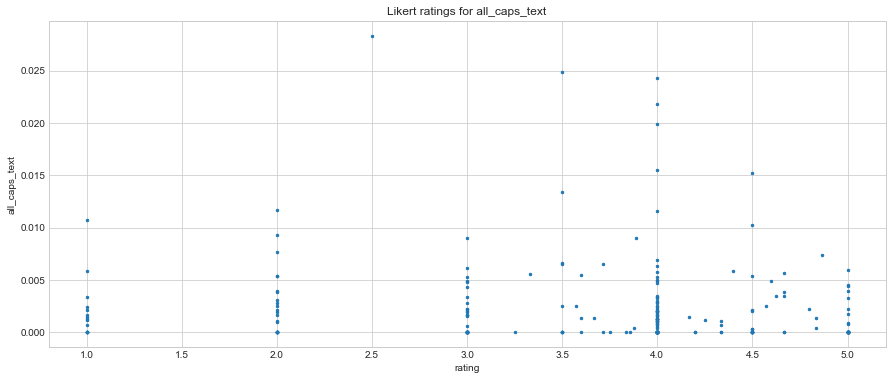

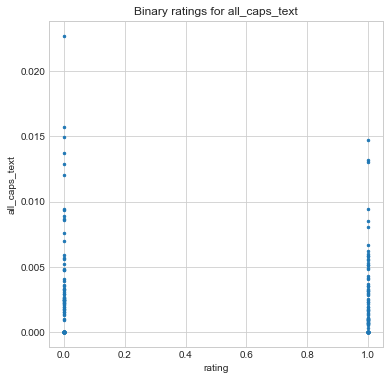

In [55]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

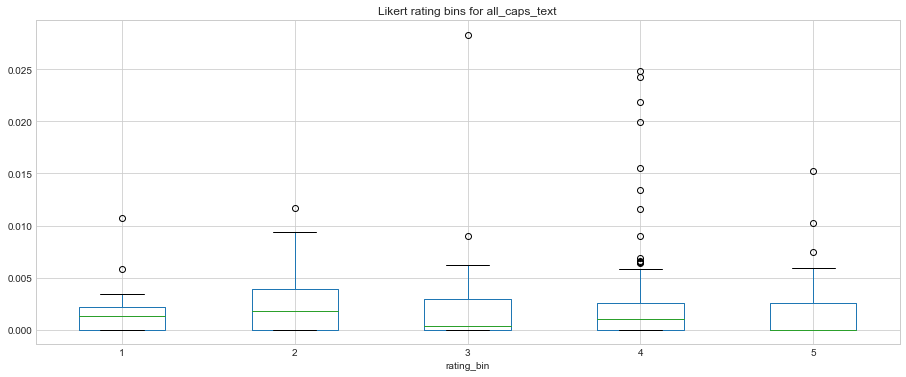

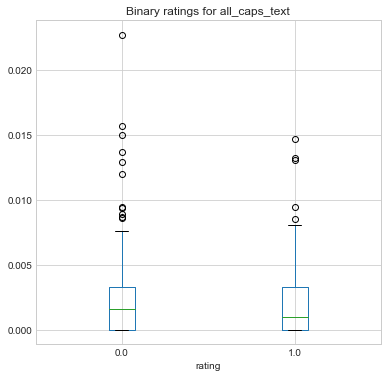

In [56]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

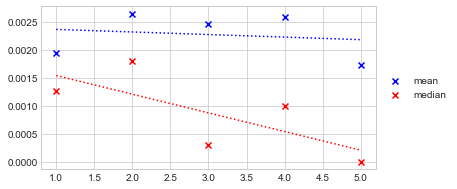

   rating      mean    median
0       1  0.001933  0.001265
1       2  0.002643  0.001798
2       3  0.002461  0.000308
3       4  0.002581  0.001000
4       5  0.001735  0.000000


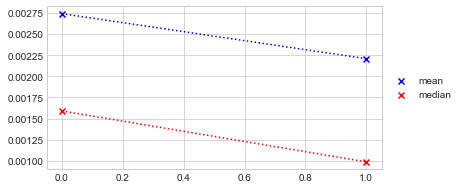

   rating      mean    median
0       0  0.002739  0.001590
1       1  0.002207  0.000988


In [57]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [58]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.10598969961330064
Likert p: 0.09998788544835477

Binary rho: -0.0073697423036497055
Binary p: 0.9175089928048176


## All caps (headline)

In [59]:
signal = "all_caps_title"

# get dataframes without rows containing missing data (-10 => signal could not be evaluated)
likert_copy = likert_df
binary_copy = binary_df
likert_df = likert_df[["rating", "rating_bin", signal]][likert_df[signal] > -10]
binary_df = binary_df[["rating", signal]][binary_df[signal] > -10]

#### Scatterplots

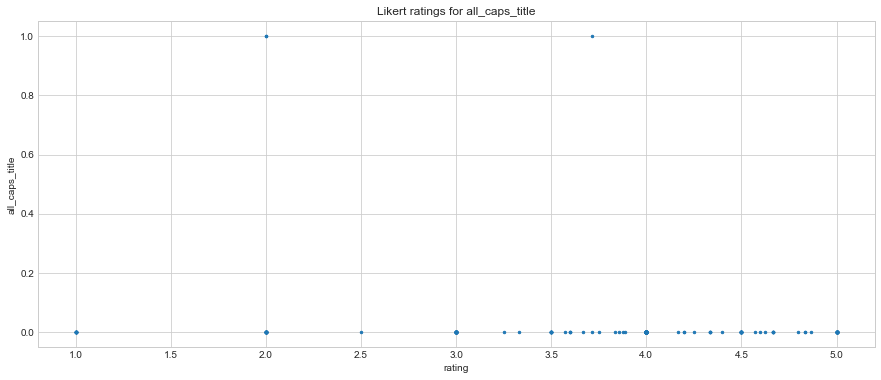

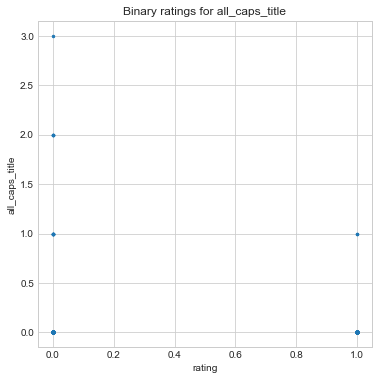

In [60]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

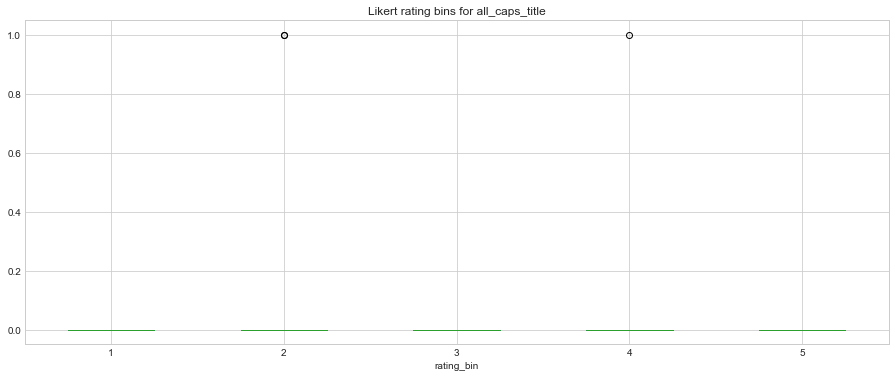

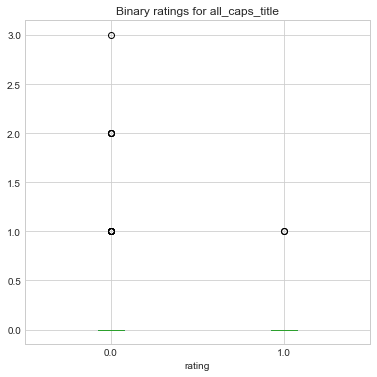

In [61]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

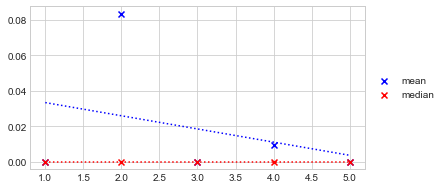

   rating      mean  median
0       1  0.000000     0.0
1       2  0.083333     0.0
2       3  0.000000     0.0
3       4  0.009259     0.0
4       5  0.000000     0.0


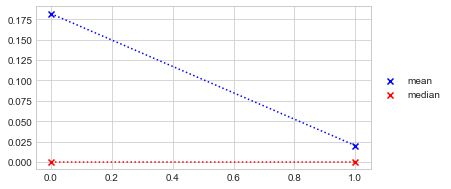

   rating      mean  median
0       0  0.181818     0.0
1       1  0.020000     0.0


In [62]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [63]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.12191365115834824
Likert p: 0.06094288397309075

Binary rho: -0.19972818451579574
Binary p: 0.004679341201429841


In [64]:
# get back original dataframes
likert_df = likert_copy
binary_df = binary_copy

## Number of words (text)

In [65]:
signal = "word_count_text"

#### Scatterplots

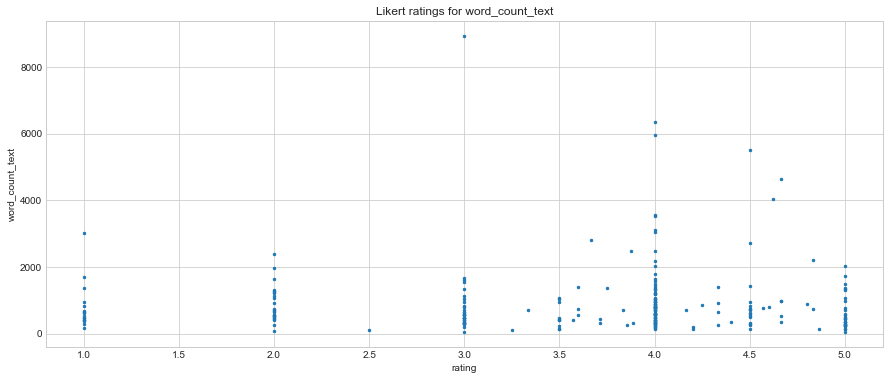

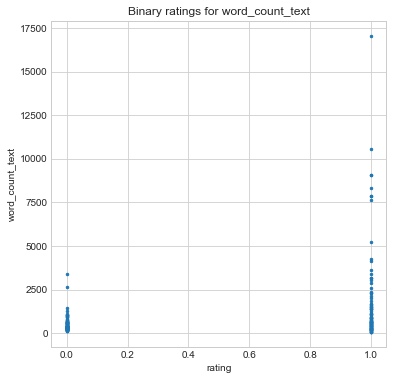

In [66]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

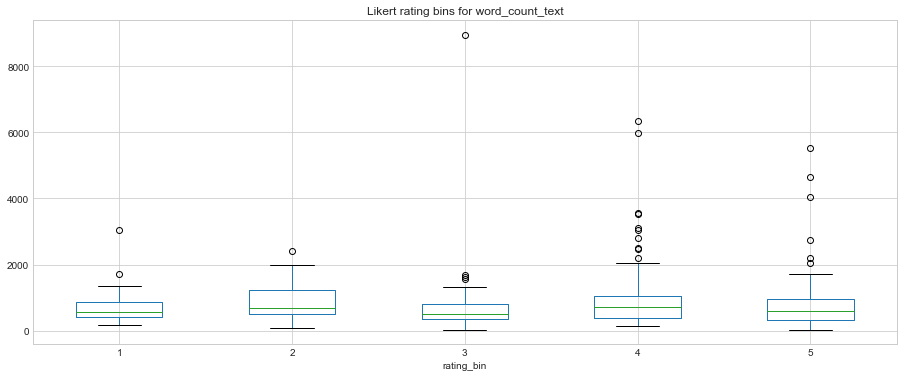

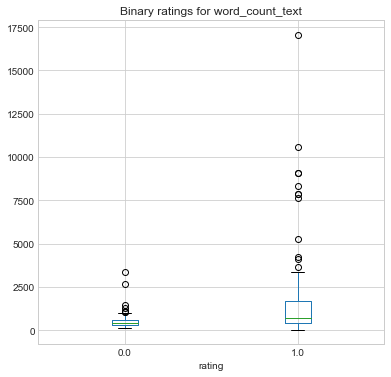

In [67]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

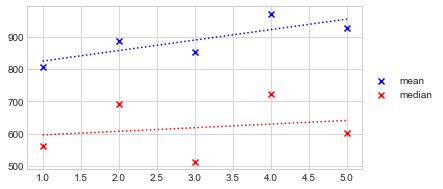

   rating        mean  median
0       1  807.437500   562.0
1       2  887.625000   692.0
2       3  852.194444   512.5
3       4  971.055046   722.0
4       5  928.017544   603.0


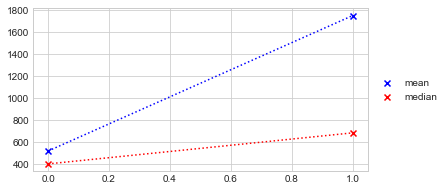

   rating     mean  median
0       0   515.86   398.0
1       1  1750.36   681.0


In [68]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [69]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.009532095286057274
Likert p: 0.8827214412777182

Binary rho: 0.3333405948273794
Binary p: 1.4122769097401264e-06


## Number of words (headline)

In [82]:
signal = "word_count_title"

# get dataframes without rows containing missing data (-10 => signal could not be evaluated)
likert_copy = likert_df
binary_copy = binary_df
likert_df = likert_df[["rating", "rating_bin", signal]][likert_df[signal] > -10]
binary_df = binary_df[["rating", signal]][binary_df[signal] > -10]

#### Scatterplots

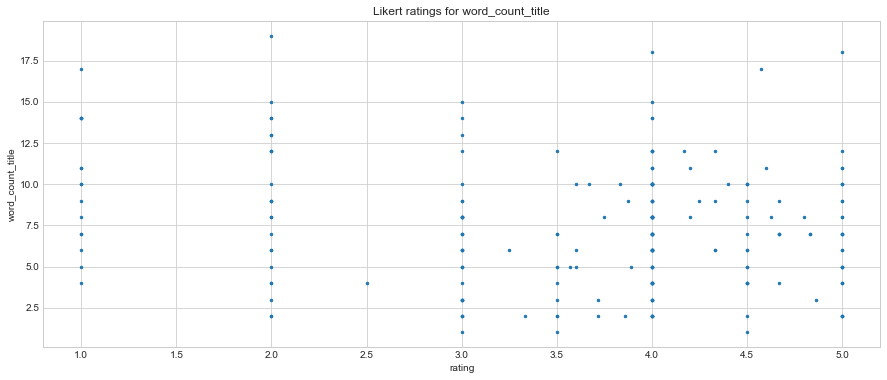

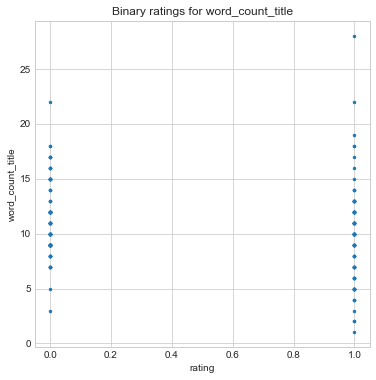

In [83]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

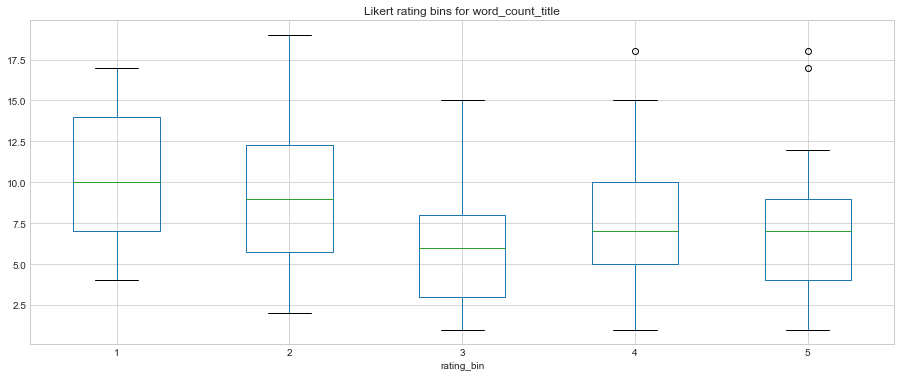

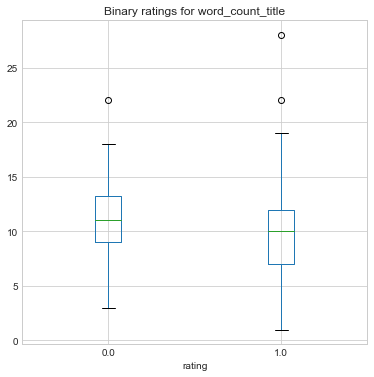

In [84]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

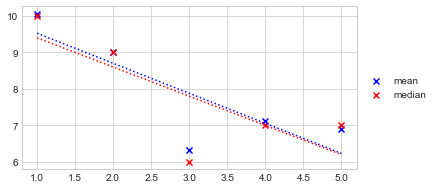

   rating       mean  median
0       1  10.062500    10.0
1       2   9.000000     9.0
2       3   6.333333     6.0
3       4   7.110092     7.0
4       5   6.892857     7.0


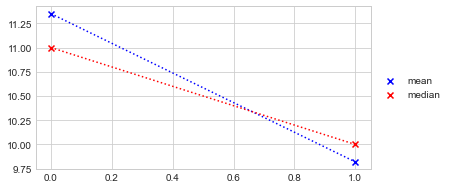

   rating   mean  median
0       0  11.35    11.0
1       1   9.82    10.0


In [85]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [86]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.07934272463432682
Likert p: 0.21972410027400135

Binary rho: -0.20146207554196127
Binary p: 0.004227929418640002


In [87]:
# get back original dataframes
likert_df = likert_copy
binary_df = binary_copy

## Number of sentences

In [93]:
signal = "sentence_count"

#### Scatterplots

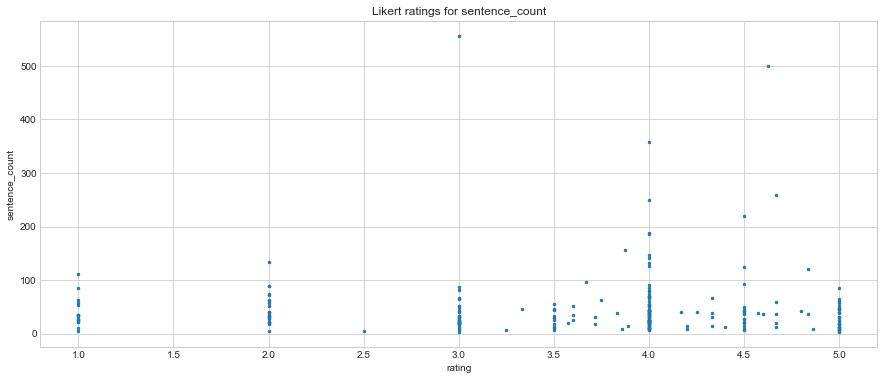

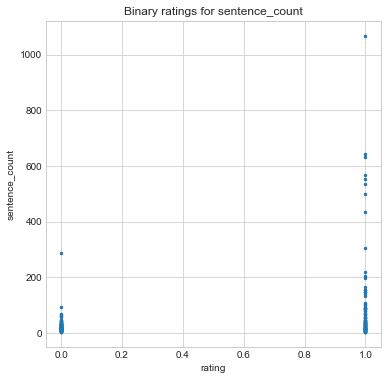

In [94]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

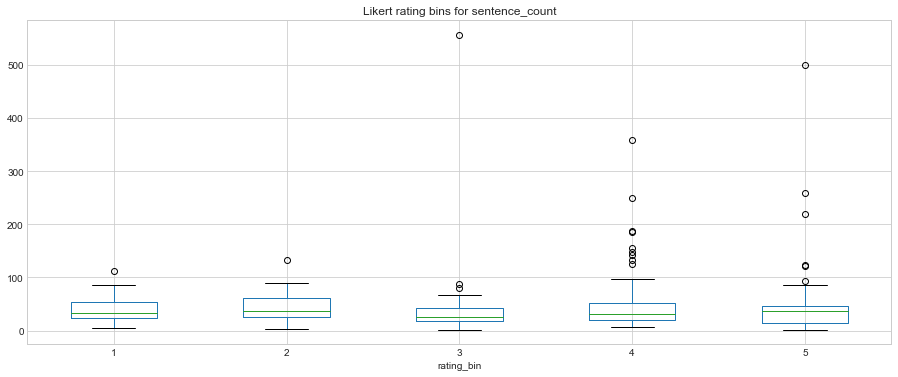

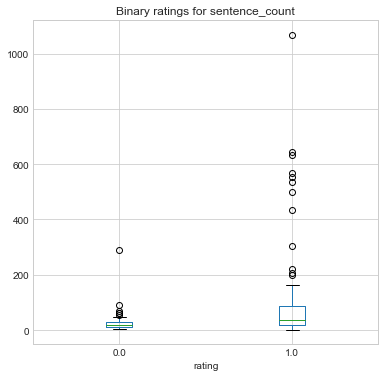

In [95]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

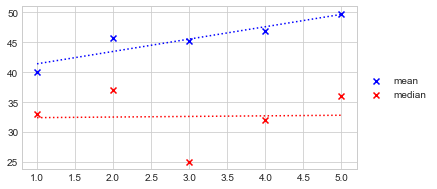

   rating       mean  median
0       1  40.062500    33.0
1       2  45.708333    37.0
2       3  45.194444    25.0
3       4  46.917431    32.0
4       5  49.789474    36.0


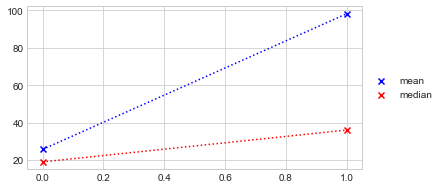

   rating   mean  median
0       0  25.65    19.0
1       1  98.09    36.0


In [96]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [97]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.039574428649663575
Likert p: 0.5400838505459208

Binary rho: 0.32885651274509553
Binary p: 1.9894669410128275e-06


## TTR

In [98]:
signal = "ttr"

#### Scatterplots

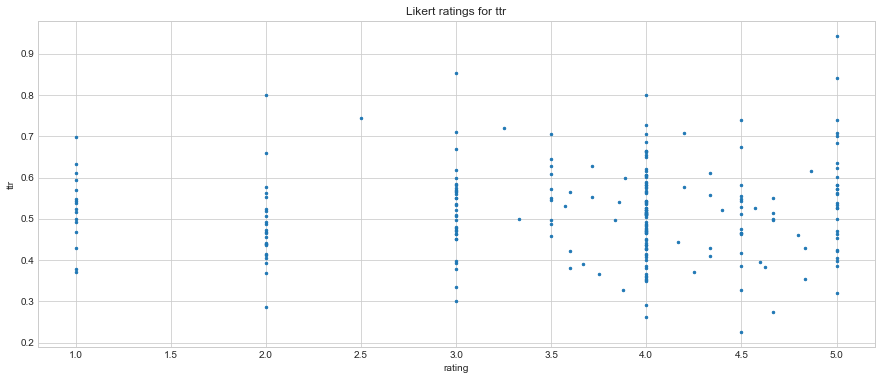

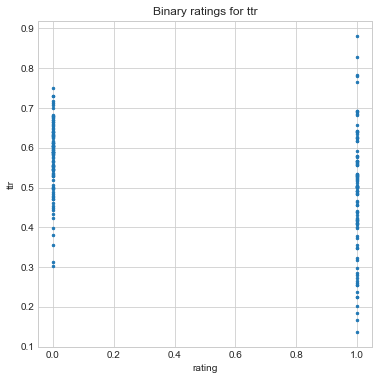

In [99]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

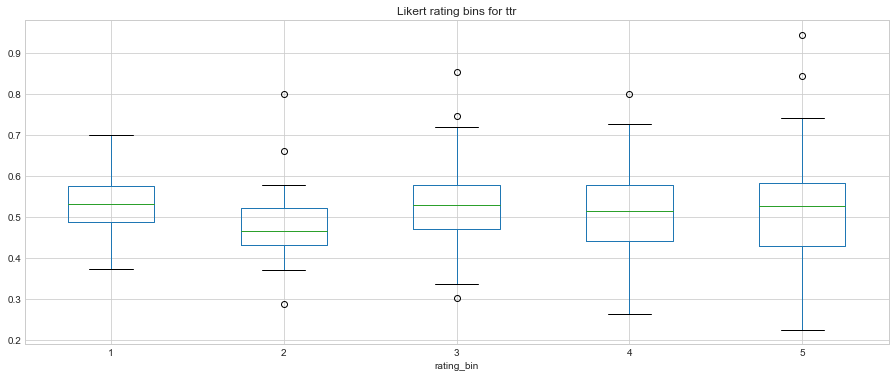

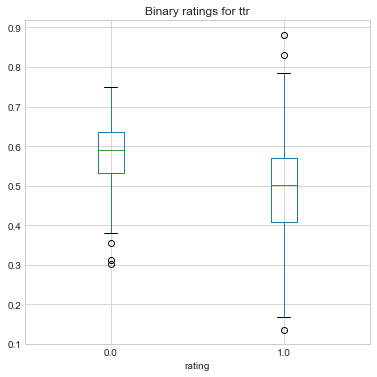

In [100]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

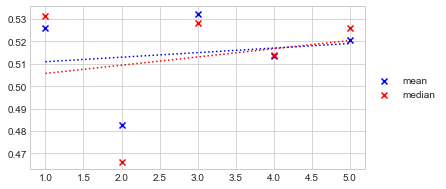

   rating      mean    median
0       1  0.525755  0.531136
1       2  0.482664  0.466202
2       3  0.532292  0.528038
3       4  0.513198  0.513750
4       5  0.520632  0.525720


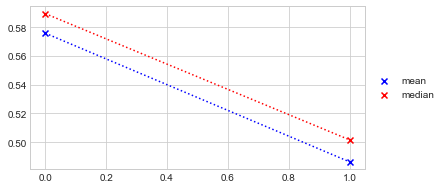

   rating      mean    median
0       0  0.575757  0.589353
1       1  0.486334  0.501620


In [101]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [102]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: 0.023065070437424225
Likert p: 0.7210932857452781

Binary rho: -0.3520438592322407
Binary p: 3.186911758117203e-07


## Average word length (text)

In [103]:
signal = "word_length_text"

#### Scatterplots

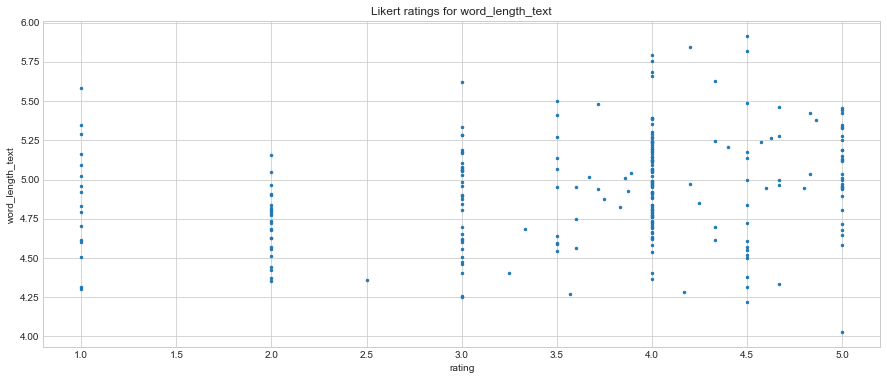

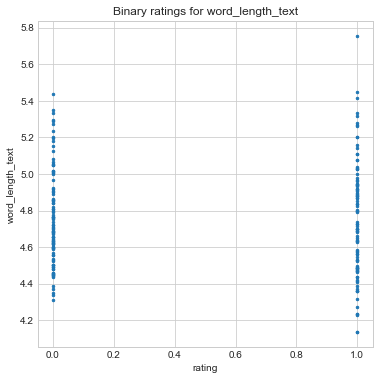

In [104]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

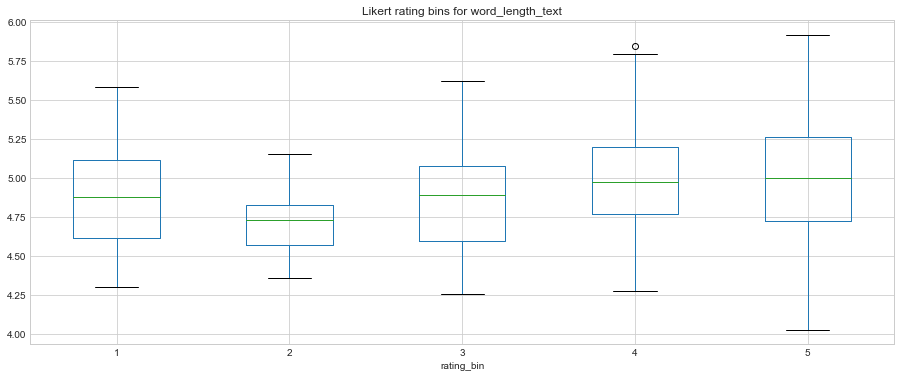

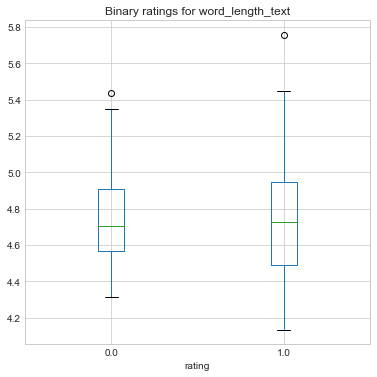

In [105]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

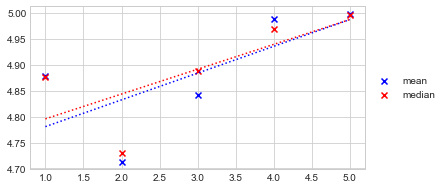

   rating      mean    median
0       1  4.878018  4.876269
1       2  4.712736  4.728927
2       3  4.842374  4.887041
3       4  4.987523  4.968750
4       5  4.998414  4.995606


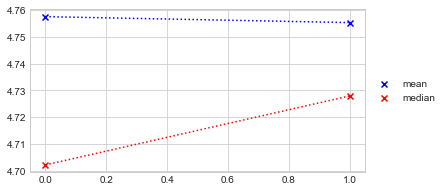

   rating      mean    median
0       0  4.757525  4.702157
1       1  4.755295  4.727925


In [106]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [107]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: 0.252105410427484
Likert p: 7.31565240537323e-05

Binary rho: -0.0034641449172198597
Binary p: 0.9611715425545042


## Average word length (headline)

In [108]:
signal = "word_length_title"

# get dataframes without rows containing missing data (-10 => signal could not be evaluated)
likert_copy = likert_df
binary_copy = binary_df
likert_df = likert_df[["rating", "rating_bin", signal]][likert_df[signal] > -10]
binary_df = binary_df[["rating", signal]][binary_df[signal] > -10]

#### Scatterplots

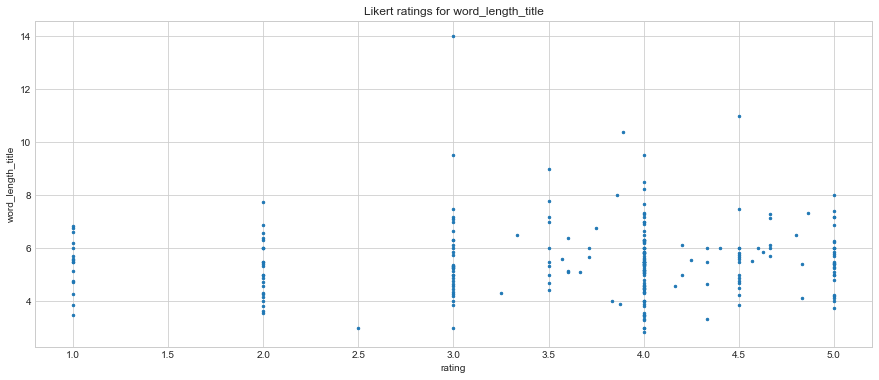

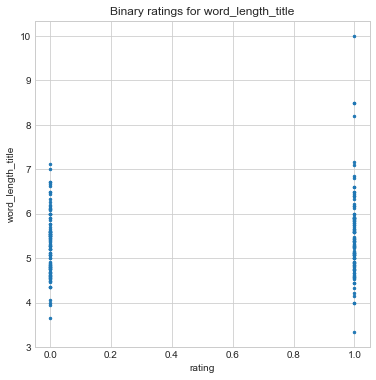

In [109]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

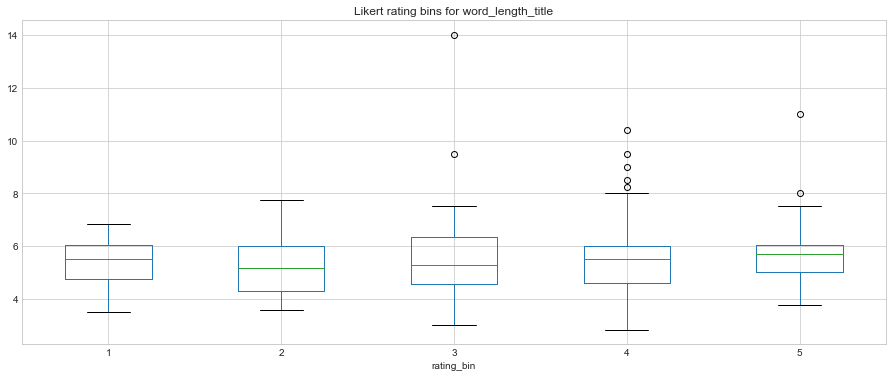

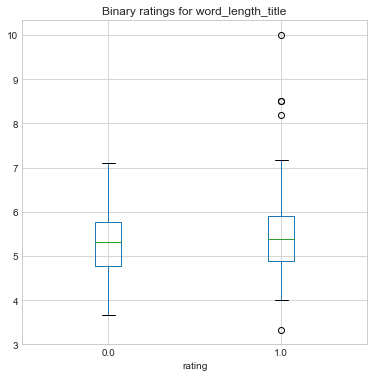

In [110]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

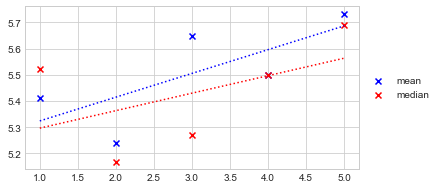

   rating      mean    median
0       1  5.409334  5.522727
1       2  5.237952  5.166667
2       3  5.646853  5.267857
3       4  5.497924  5.500000
4       5  5.733739  5.690476


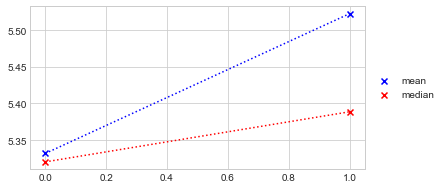

   rating      mean    median
0       0  5.332043  5.320513
1       1  5.522312  5.388736


In [111]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [112]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: 0.06795559299217947
Likert p: 0.29340342616463

Binary rho: 0.07656397704635184
Binary p: 0.2812240003919015


In [113]:
# get back original dataframes
likert_df = likert_copy
binary_df = binary_copy

## Profanity

In [114]:
signal = "profanity"

#### Scatterplots

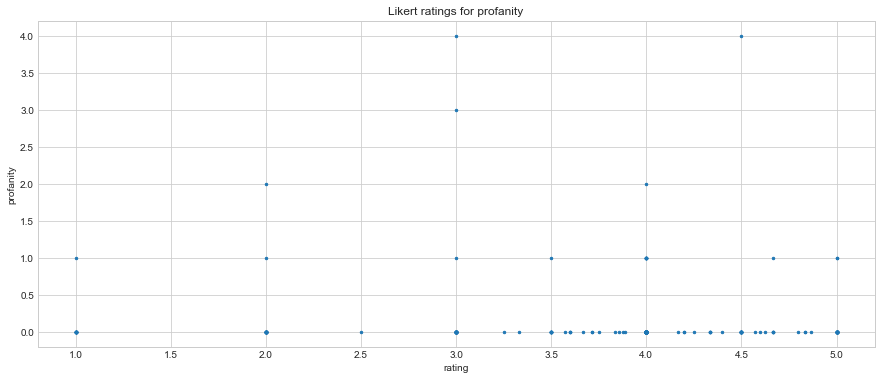

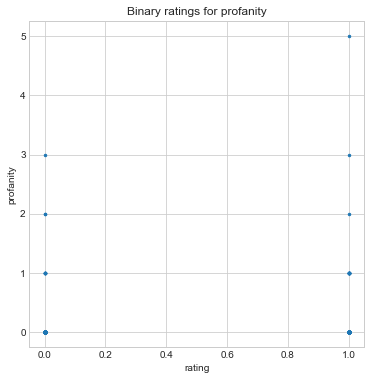

In [115]:
likert_df.plot.scatter("rating", signal, s=6, figsize=(15, 6), title="Likert ratings for " + signal)
plt.show()
binary_df.plot.scatter("rating", signal, s=6, figsize=(6, 6), title="Binary ratings for " + signal)
plt.show()

#### Boxplots

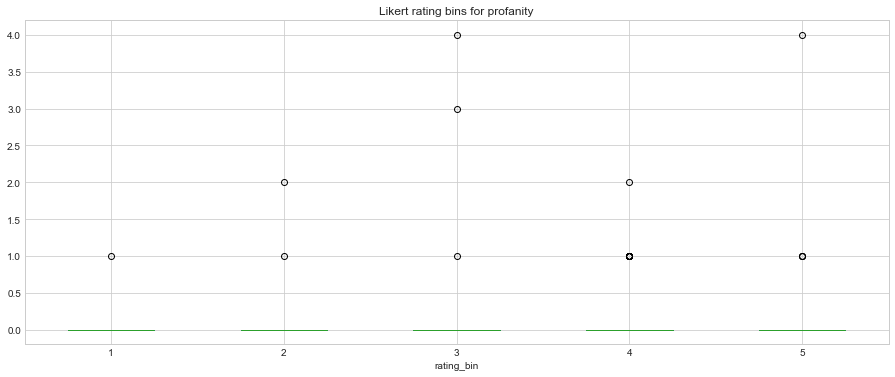

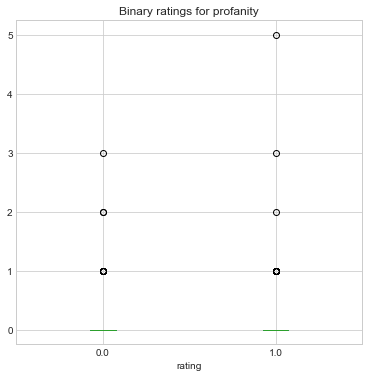

In [116]:
likert_df.boxplot(by="rating_bin", column=signal, figsize=(15, 6)).set_title("Likert rating bins for " + signal)
plt.suptitle("")
plt.show()
binary_df.boxplot(by="rating", column=signal, figsize=(6, 6)).set_title("Binary ratings for " + signal)
plt.suptitle("")
plt.show()

#### Mean & median

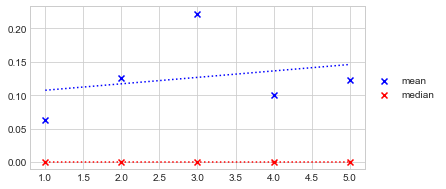

   rating      mean  median
0       1  0.062500     0.0
1       2  0.125000     0.0
2       3  0.222222     0.0
3       4  0.100917     0.0
4       5  0.122807     0.0


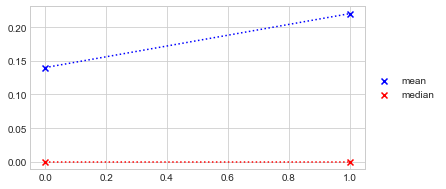

   rating  mean  median
0       0  0.14     0.0
1       1  0.22     0.0


In [117]:
likert_means = [likert_df[likert_df.rating_bin == rating][signal].mean() for rating in [1, 2, 3, 4, 5]]
likert_medians = [likert_df[likert_df.rating_bin == rating][signal].median() for rating in [1, 2, 3, 4, 5]]
binary_means = [binary_df[binary_df.rating == rating][signal].mean() for rating in [0, 1]]
binary_medians = [binary_df[binary_df.rating == rating][signal].median() for rating in [0, 1]]

likert_table = pd.DataFrame({"rating": [1, 2, 3, 4, 5], "mean": likert_means, "median": likert_medians})
binary_table = pd.DataFrame({"rating": [0, 1], "mean": binary_means, "median": binary_medians})

# plot for likert ratings
plt.figure(figsize=(6, 3))
plt.scatter(likert_table["rating"], likert_table["mean"], c="b", marker="x", label="mean")
plt.scatter(likert_table["rating"], likert_table["median"], c="r", marker="x", label="median")

# trend line
lp_means = np.poly1d(np.polyfit(likert_table["rating"], likert_table["mean"], 1))
lp_medians = np.poly1d(np.polyfit(likert_table["rating"], likert_table["median"], 1))
plt.plot(likert_table["rating"], lp_means(likert_table["rating"]), "b:")
plt.plot(likert_table["rating"], lp_medians(likert_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(likert_table)

# plot for binary ratings
plt.figure(figsize=(6, 3))
plt.scatter(binary_table["rating"], binary_table["mean"], c="b", marker="x", label="mean")
plt.scatter(binary_table["rating"], binary_table["median"], c="r", marker="x", label="median")

# trend line
bp_means = np.poly1d(np.polyfit(binary_table["rating"], binary_table["mean"], 1))
bp_medians = np.poly1d(np.polyfit(binary_table["rating"], binary_table["median"], 1))
plt.plot(binary_table["rating"], bp_means(binary_table["rating"]), "b:")
plt.plot(binary_table["rating"], bp_medians(binary_table["rating"]), "r:")

plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()
print(binary_table)

#### Spearman correlation

In [118]:
likert_rho, likert_p = spearmanr(likert_df[signal], likert_df["rating"])
binary_rho, binary_p = spearmanr(binary_df[signal], binary_df["rating"])

print("Likert rho: " + str(likert_rho) + "\nLikert p: " + str(likert_p) + "\n")
print("Binary rho: " + str(binary_rho) + "\nBinary p: " + str(binary_p))

Likert rho: -0.0053747687926564485
Likert p: 0.9337088355472831

Binary rho: 0.07380722192704844
Binary p: 0.2989598298954508
